## Circuit concepts and definitions

**qubit**
The basic unit of quantum information.

**unitary operation**
A reversible operation on a quantum state. All quantum gates are unitary operations (by definition).

**abstract cricuit**
A circuit defined in terms of abstract mathematical operations and virtual qubits.

**ancilla qubit**
An extra qubit that is used to help implement operations on other qubits, but whose final state is not important for the program.

**virtual qubit**
An abstract, mathematical qubit used to build an abstract circuit. Virtual qubits are how one typically thinks about quantum algorithms at a high level; we assume that all quantum gates are valid on all virtual qubits, and all virtual qubits are always connected to every other virtual qubit.

**circuit**
A computational routine the defines a single execution to be taken on a QPU. This can either be an abstract circuit or a physical circuit

**clbit**
A Qiskit-specific abbreviation meaning a single classical bit of data.

**gate**
A unitary operation on one or more qubits.

**logical qubit**
A collection of several physical qubits that are controlled together by a QPU (from the user’s perspective) to apply real-time quantum error correction. A logical qubit is a type of hardware qubit for Qiskit.

**hardware qubit**
The representation of a single qubit on a particular QPU. A hardware qubit has some physical quantum-mechanical system backing it, such as superconducting circuits; unlike a virtual qubit, it has particular coupling constraints and only certain gates can be applied to certain groups of hardware qubits. Qiskit does not distinguish logical qubits from any individual physical qubits when talking about hardware qubits. 

**Instruction set architecture**
The abstract model of which operations are available on which sets of hardware qubits on one particular QPU.

**measurement**
The act of extracting one classical bit of a data from a single qubit state.

**physical circuit**
A circuit defined in terms of hardware qubits and only the quantum operations available in a particular QPU’s ISA.

**physical qubit**
A controllable two-level quantum system. This is literally one “physics” qubit, such as a transmon or the electronic state of a trapped ion.

**quantum processing unit (QPU)**
Analogous to a CPU in classical computing or a GPU in graphics processing, a QPU is the hardware that runs quantum operations on quantum data.

**real-time classical computation**
Any classical computation that can happen within the execution of a single shot of a circuit, where the results of the classical computation can affect later execution of the circuit.

In [35]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

## Quantum circuit model

The fundamental element of quantum computing is the _quantum circuit_. This is a computational routine that can be run, one shot at a time, on a quantum processing unit (QPU). A circuit will act on qubits qith unitary operations (gates), measurements and resets. A quantum circuit can contain operations on classical data.

Circuits are at a low level of abstraction when building up quantum programs. They are the construct that is used to build up to higher levels of abstraction, such as the [primitives of quantum computation](https://docs.quantum.ibm.com/api/qiskit/primitives#qiskit-primitives), which accumulate data from many shots of quantum-circuit execution, along with advanced error-mitigation techniques and measurement optimizations, into well-typed classical data and error statistics.

In Qiskit, we can construct circuits from
- abstract circuits (cirtual qubits)
- physical circuits (hardware wubits from a backend)

We can convert an abstract circuit into a physical circuit using [Qiskit's transpilation package](https://docs.quantum.ibm.com/api/qiskit/transpiler#qiskit-transpiler), of which the top level access point is [transpile()](https://docs.quantum.ibm.com/api/qiskit/compiler#qiskit.compiler.transpile).

For example, we can define the GHZ state
$$ \ket{\psi}=\frac{\ket{000}+\ket{111}}{\sqrt{2}} $$

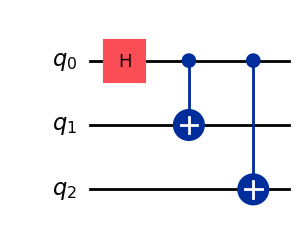

In [2]:
# create the circuit with a register with the number of qubits, in this case 3
qc = QuantumCircuit(3, name='first_qc')
# now apply the gates to form the GHZ state
qc.h(0)
qc.cx(control_qubit=0, target_qubit=1)
qc.cx(control_qubit=0, target_qubit=2)
# draw the circuit
qc.draw(output='mpl')

Now let's create a simple vector state and measure it

In [7]:
u = Statevector([1 / np.sqrt(2), 1 / np.sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])
v.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
# measure one state vector one time
outcome, state = v.measure()
state.draw('latex')

<IPython.core.display.Latex object>

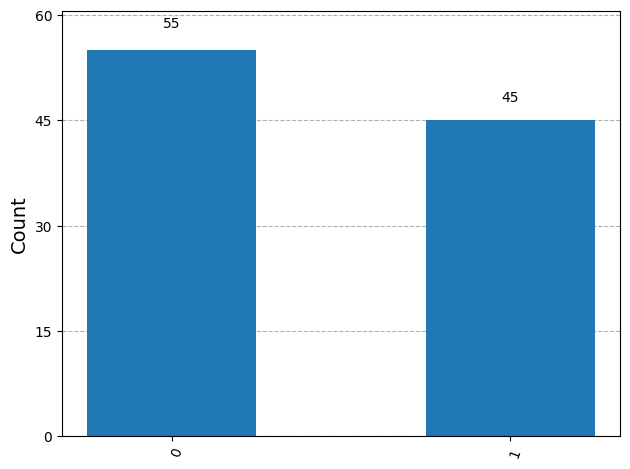

In [12]:
# maesure the state n-times and plot
stats = v.sample_counts(shots=100)
plot_histogram(stats)

I can also evolve this state with some unitary operations. I can define my own operators

In [20]:
# we can perform operations and create our operator
Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / np.sqrt(2)]])
# list of operators, I can modify the evolution
ops = [H, T, H, S, Y]

# and we can evolve a state
v = Statevector([1, 0])
for operator in ops:
    v = v.evolve(operator)
    display(v.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

But there is a more efficient way to do this

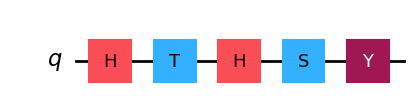

In [44]:
# define quantum circuit of one qubit
qc = QuantumCircuit(1)

# apply the gates. That is, evolve the state
qc.h(0)
qc.t(0)
qc.h(0)
qc.s(0)
qc.y(0)

# draw the circuit
qc.draw(output='mpl')

And we can derive the matrix from the circuit

In [45]:
Operator.from_circuit(qc).draw('latex')

<IPython.core.display.Latex object>

So we can initialize a state and then evolve it with this matrix

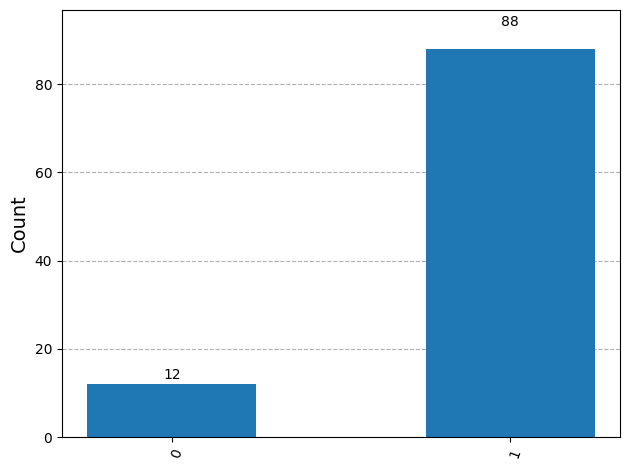

In [47]:
# initialize the state at |0>
ket0 = Statevector([1, 0])
# evolve with the quantum circuit
evo  = ket0.evolve(qc)

# run and plot the results
stats = evo.sample_counts(shots=100)
plot_histogram(stats)